**Exercise**

    1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. 
      Drop other two features for simplicity.
    2.Figure out if any preprocessing such as scaling would help here
    3.Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X=iris.data[:,2:]

Text(0, 0.5, 'petal width (cm)')

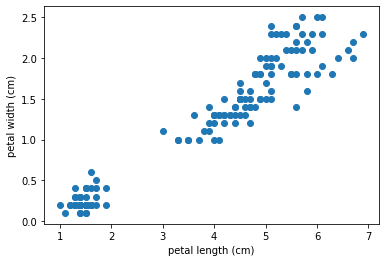

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [8]:
#kmeans without scaling
km=KMeans(n_clusters=3)

In [9]:
y_pred=km.fit_predict(X)

In [10]:
results=pd.DataFrame(X,columns=['petal length (cm)',
 'petal width (cm)'])

In [11]:
results['target']=y_pred

In [12]:
results

,petal length (cm),petal width (cm),target
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [13]:
target_0=results[results.target==0]
target_1=results[results.target==1]
target_2=results[results.target==2]

Text(0, 0.5, 'petal width (cm)')

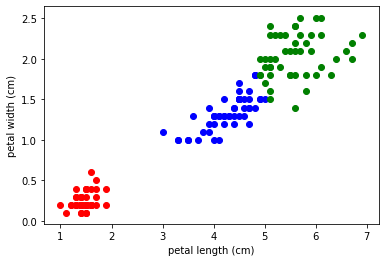

In [14]:
plt.scatter(target_0['petal length (cm)'],target_0['petal width (cm)'],color='blue')
plt.scatter(target_1['petal length (cm)'],target_1['petal width (cm)'],color='red')
plt.scatter(target_2['petal length (cm)'],target_2['petal width (cm)'],color='green')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Scaler

In [15]:
scaler=MinMaxScaler()
results['petal length (cm)']=scaler.fit_transform(results[['petal length (cm)']])
results['petal width (cm)']=scaler.fit_transform(results[['petal width (cm)']])

In [16]:
results

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


Text(0, 0.5, 'petal width (cm)')

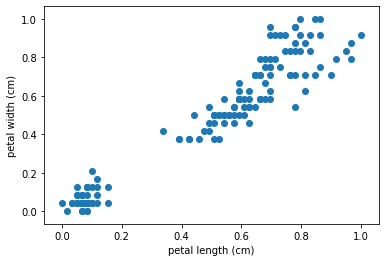

In [17]:
plt.scatter(results['petal length (cm)'],results['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [18]:
target_0=results[results.target==0]
target_1=results[results.target==1]
target_2=results[results.target==2]

Text(0, 0.5, 'petal width (cm)')

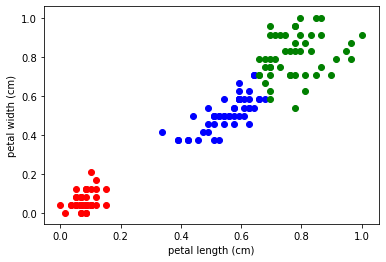

In [19]:
plt.scatter(target_0['petal length (cm)'],target_0['petal width (cm)'],color='blue')
plt.scatter(target_1['petal length (cm)'],target_1['petal width (cm)'],color='red')
plt.scatter(target_2['petal length (cm)'],target_2['petal width (cm)'],color='green')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# elbow plot for value k

In [20]:
k_list=list(range(1,10))
sse_list=[]

In [21]:
for k in k_list:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

Text(0, 0.5, 'Sum of squared error')

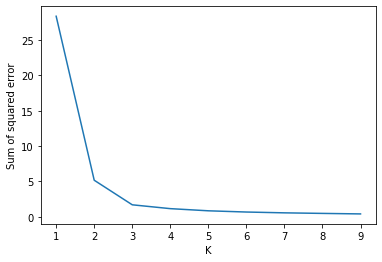

In [22]:
#optimal value of K=3
plt.plot(k_list,sse_list)
plt.xlabel('K')
plt.ylabel('Sum of squared error')